# **Lab: Linear Regression using Scikit-Learn**

**Goals :**

- Utilize scikit-learn to implement linear regression using Gradient Descent

# Tools

In [50]:
#  Change the current working directory so that Python can directly access the local utility modules in this folder
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms

/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Algorithms/Supervised_Algorithms


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor #  Stochastic Gradient Descent (SGD)
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Preparing The Data

**Load the data set :**

In [52]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

**Scale/normalize the training data :**

In [53]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


**Create and fit the regression model :**

In [54]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 140, number of weight updates: 13861.0


**View parameters :**

In [55]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.26 -21.16 -32.59 -37.99], b:[363.14]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


# Make predictions

Predict the targets of the training data. Use both the predict routine and compute using w and b

In [57]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.23 485.79 389.48 491.95]
Target values 
[300.  509.8 394.  540. ]


Blot Results

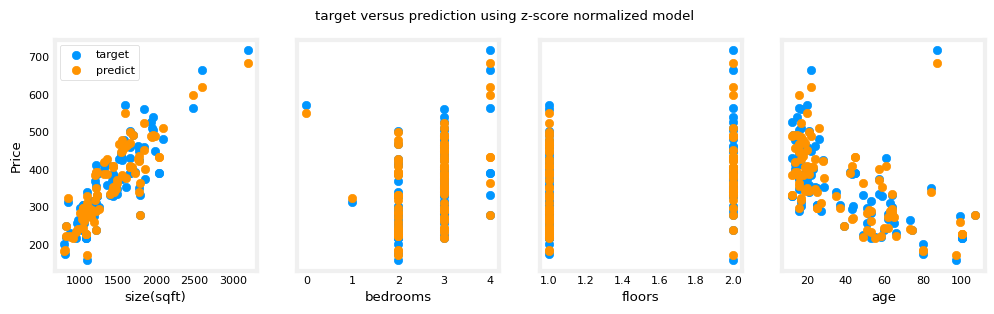

In [58]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

**Congratulations!**
In this lab we :

- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit